<a href="https://colab.research.google.com/github/AymanBard/MachineLearningOption/blob/main/%5B02%5D_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La régression linéaire : solution en forme close et descente de gradient

## Données
On commence par générer des données. Les données en entrée seront dans $\mathbb{R}$, et pour chaque point $x_i \in \mathbb{R}$, il faudra prédire un $y_i \in \mathbb{R}$.

In [1]:
import numpy as np
nb_points = 30
true_w = -.8
true_b = .5
data_x = np.random.rand(nb_points, 1)
data_y = data_x * true_w + true_b + np.random.randn(nb_points, 1) * .1

In [7]:
print('données en entrée\n', data_x)
print('données à prédire\n', data_y)

données en entrée
 [[0.96384216]
 [0.40547157]
 [0.23305375]
 [0.72334374]
 [0.74783418]
 [0.26810973]
 [0.96784581]
 [0.10760555]
 [0.39505672]
 [0.72267334]
 [0.61034507]
 [0.60468151]
 [0.85454079]
 [0.62981456]
 [0.92200975]
 [0.67150327]
 [0.82726147]
 [0.79427361]
 [0.1533673 ]
 [0.17216837]
 [0.3740339 ]
 [0.1229909 ]
 [0.25487446]
 [0.09172723]
 [0.68116852]
 [0.56167405]
 [0.44501031]
 [0.62749635]
 [0.34038267]
 [0.07657686]]
données à prédire
 [[-0.39934581]
 [ 0.10823642]
 [ 0.31710654]
 [ 0.0305384 ]
 [-0.09133689]
 [ 0.32578763]
 [-0.17882128]
 [ 0.33633165]
 [-0.09354798]
 [ 0.00972188]
 [-0.06907102]
 [ 0.03825497]
 [-0.28403327]
 [-0.08691627]
 [-0.29930437]
 [ 0.05192747]
 [-0.23992654]
 [-0.2304299 ]
 [ 0.42647441]
 [ 0.33440228]
 [ 0.24744722]
 [ 0.57288623]
 [ 0.32121655]
 [ 0.3331011 ]
 [ 0.02852602]
 [ 0.12806073]
 [ 0.22140818]
 [-0.07997662]
 [ 0.134171  ]
 [ 0.4019459 ]]


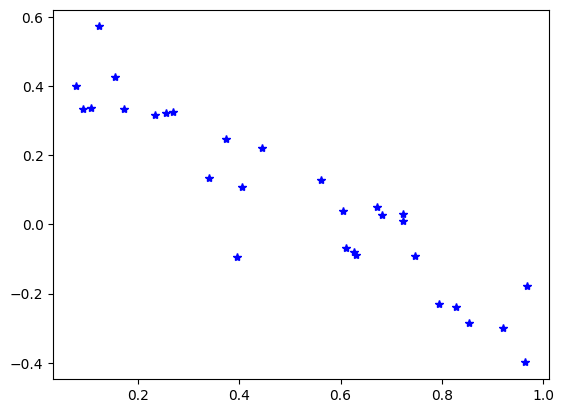

In [6]:
import matplotlib.pyplot as plt
plt.plot(data_x, data_y, '*b')
plt.show()

In [12]:
w = np.random.randn()
b = np.random.randn()

## Visualisation du modèle

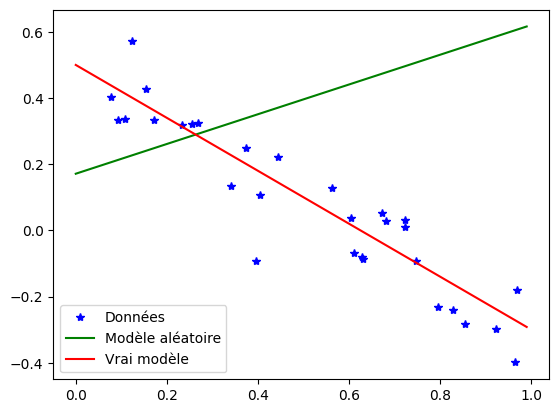

In [13]:
plt.plot(data_x, data_y, '*b')
o = np.arange(0, 1, .01)
a = w * o + b
plt.plot(o, a, '-g')
true_a = true_w * o + true_b
plt.plot(o, true_a, '-r')
plt.legend(['Données', 'Modèle aléatoire', 'Vrai modèle'])
plt.show()

# Exercices

## 1
Calculer l'Erreur Quadratique Moyenne (EQM) du modèle $\frac{1}{K}∑_{i=0}^{K-1} (\hat{y_i} - y_i)^2$ où $\hat{y_i} = w x_i + b$

In [14]:
res = 0
for i in range(len(data_x)):
  res += ((np.dot(w,data_x[i])+b)-data_y[i])**2
res = res / len(data_x)
print(res)

[0.23802123]


## 2
Trouver `w_opt` et `b_opt` qui minimisent l'EQM. S'assurer que l'EQM de ce modèle est inférieure à l'EQM du modèle aléatoire calculé en 1, et vérifier que le gradient de l'EQM est nul en `(w_opt, b_opt)`



In [18]:
Z = np.ones((nb_points, 2))
print(Z)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [16]:
Z.T @ Z

array([[30., 30.],
       [30., 30.]])

## 3
Soit les nouvelles données `data_x_test`. Calculer la prédiction de votre modèle pour ces données et afficher graphiquement les données, les prédictions et le modèle ayant généré les données initiales

In [ ]:
nb_points_test = 10
data_x_test = np.random.rand(nb_points_test, 1)

## 4

Calculer la dérivée de l'EQM par rapport à `w` et `b` (sur papier)

## 5
Coder l'algorithme de descente de gradient pour la régression linéaire. Comparer le modèle obtenu avec la solution en forme close